# Linear Regression

* The aim of Linear Regression algotithm is to find the linear function expressing the relationship between dependent and independent variable.


* There is only one independent variable

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## 1-) First glance at data set

In [2]:
import pandas as pd
ad=pd.read_csv("Advertising.csv", usecols=[1,2,3,4])
df=ad.copy()
df.head()

# when we import the CVS file so_called "Advertising.csv" without "usecols=[1,2,3,4]" notation,
# fisrt columns of ddata frame was indexes of the observation values.
#in order to extrat the firts column of the data frame ,we use  "usecols=[1,2,3,4]" 
#usecols=[1,2,3,4] means that we specified  the columns of  data frame which index we want to put in the columns.

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


* If there is a large numerical difference between the mean and the median values, the data set is skewed. It has no normal distribution.



* If mean and median values are numerically close to each other, we can assume that the data set has a normal distribution.



* In the above chart, you can get mean values from the **"Mean" column** 



* You can get median values from **"50%" column** 

In [5]:
df.isnull().sum() # There is  no missing value in the data frame

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


* Above chart  shows the correlation (proportional relationship) of all features(columns) with each others.


* We can conclude that the highest correlation  (0.782224)      between **Sales**, which is the dependent variable, and the **TV Advertisement**, which are independent variables.



* Radio advertisements affects the sales  in a positive medium level. However, the correlation (0.054809) between Radio advertisements  and TV advertisements is TOO LOW.



* We conclude that **Sales** are the most positively affected by **TV Advertisement** . BUT since the correlation (0.054809) between radio advertisements  and TV advertisements is too low, **Radio advertisements** can also contribute to sales much more.










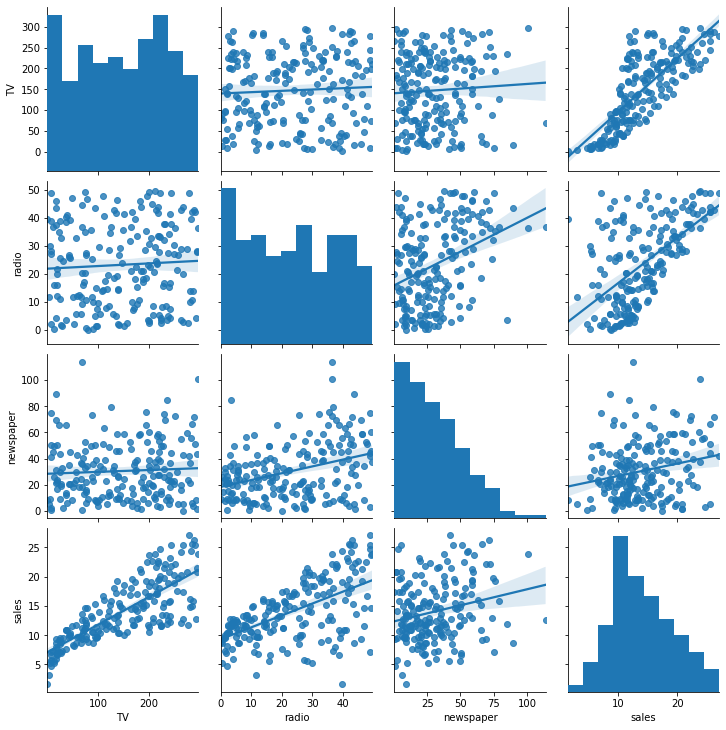

In [7]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

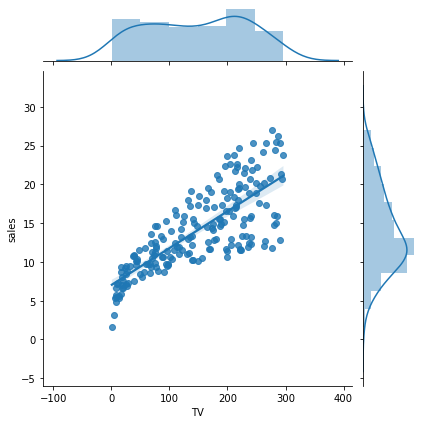

In [8]:
sns.jointplot(x="TV", y="sales",data=df,kind="reg");

## 2-) Modelling with STATSMODELS.API library

In [9]:
import statsmodels.api as sm

In [10]:
x=df[["TV"]] # TV  is independent variable
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
x=sm.add_constant(x)

* By executing above code, We added a column consisting of a fixed number in order to apply a linear regression model to the dataframe which was consisting of  **only TV** column.

In [12]:
x.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y= df["sales"] # column of sales is dependent variable
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
lm=sm.OLS(y,x)


In [15]:
model=lm.fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        23:36:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* To access statistical data we should use the **statsmodel library** instead of **skitlearn library*


* **Dep. Variable:** Sales


*   **R-squared:0.612** This numerical value represents success of explaining the variation of the independent variable on the dependent variable. In other words, the **"TV"**  can explain about 61% of the variation in the **"Sales"** 



* **Prob (F-statistic):1.47e-42** This numerical value represent  **p value**.If p value is less than 0.05, the model is statistically reliable an valid.



* **coef:** These numerical values represent the coefficients of the independent variables affecting the dependent variable according to the linear regression model.
   
   * const= 7.0326
   * TV= 0.0475
   * the formula of linear regression model is y =b + a * x 
   * SALES = 7.0326 + 0.0475 * TV advertisement 
   
   
 
 * **P>|t|:** This numerical value represent the p-value of the coefficient values.Coefficient values are statistically reliable an valid if they are less than 0.05.
   * In this example  the p-value of the coefficient values are zero. they are less than 0.05. Thus Coefficient values are statistically reliable an valid

## 3-) Modelling with STATSMODELS.FORMULA.API library

In [17]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        23:36:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params
#With this code, we obtained the coefficient and constant value of the independent variable belonging to the lineaar regression model.

Intercept    7.032594
TV           0.047537
dtype: float64

In [19]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Wed, 03 Feb 2021",Prob (F-statistic):,1.47e-42
Time:,23:36:07,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [20]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [21]:
model.summary().tables[2]

Omnibus:,0.531,Durbin-Watson:,1.935
Prob(Omnibus):,0.767,Jarque-Bera (JB):,0.669
Skew:,-0.089,Prob(JB):,0.716
Kurtosis:,2.779,Cond. No.,338.


In [22]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


* Above code returns  with 95% confidence interval of coefficient of independent variable and constant.


* In other words, the coefficient of independent variable and constant values will take a numerical value between the following two values with 95% confidence.

In [23]:
model.f_pvalue

1.4673897001947095e-42

In [24]:
print("f_pvalue: ","%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [25]:
model.rsquared_adj #  Adj. R-squared

0.6099148238341623

In [26]:
model.fittedvalues[0:5]

#we get the first five values that the model predicts

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [27]:
y[0:5]

#we get  the real first 5 values in the  data.
#we can compare with the preticted values of our model with the real values.

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [28]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

# Equation of the linear regression model.

Sales = 7.03 + TV*0.05


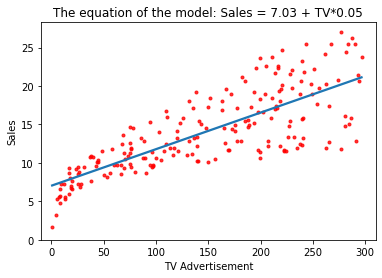

In [29]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("The equation of the model: Sales = 7.03 + TV*0.05")
g.set_ylabel("Sales")
g.set_xlabel("TV Advertisement")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

## 4-) Modelling with SKITLEARN library

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
indep=df[["TV"]]
dep=df["sales"]
reg=LinearRegression()
model1=reg.fit(indep,dep)
print("Constant Value: "+ str(model1.intercept_))
print("Coefficient of independent variable: " + str(model1.coef_))

Constant Value: 7.032593549127693
Coefficient of independent variable: [0.04753664]


In [32]:
model1.predict(indep)[0:10]

# these numbers are preticted valued by linear regression model

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## 5-) Predicting by linear regression model

**The Equation of the model:**  
* Sales= 7.032 + TV*0.047

In [33]:
indep=df[["TV"]]
dep=df["sales"]
reg=LinearRegression()
model1=reg.fit(indep,dep)

In [34]:
model1.predict([[30]])
#if we spend 30 unit for TV advertisemnet , we will be able to get 8.45869276 unit for sales 

array([8.45869276])

In [35]:
new_data = [[5],[90],[200]]

In [36]:
model1.predict(new_data)

array([ 7.27027675, 11.31089119, 16.53992164])

## 6-)The Importance of Residuals  in Machine Learning Algotithms

In [37]:
from sklearn.metrics import mean_squared_error ,r2_score

In [38]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [39]:
mse = mean_squared_error(y, model.fittedvalues)
mse

#y:  Real numerical values of the dependent variable from the data set

# model.fittedvalues:  Estimated values of dependent variables that the model predicts  

10.512652915656757

In [40]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [41]:
reg.predict(indep)[0:10] # this code from sckitlearn modeling

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [42]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [44]:
k_t = pd.DataFrame({"real dependent values": y[0:10],
                   "predicted dependent values_": reg.predict(indep)[0:10]})

k_t

,real dependent values,predicted dependent values_
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [46]:
k_t["Residuals"]=k_t["real dependent values"]-k_t["predicted dependent values_"]

k_t

,real dependent values,predicted dependent values_,Residuals
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [47]:
k_t["Square of Residual"]=k_t["Residuals"]**2
k_t

,real dependent values,predicted dependent values_,Residuals,Square of Residual
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [48]:
np.sum(k_t["Square of Residual"])

92.90350329638103

In [49]:
np.mean(k_t["Square of Residual"])

9.290350329638105

In [50]:
np.sqrt(np.mean(k_t["Square of Residual"]))

3.048007599996776

In [53]:
model.resid[0:10] # short way of the finding residuals

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

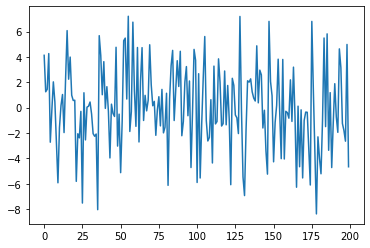

In [54]:
plt.plot(model.resid);